<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Так выделены самые важные замечания, их нужно обязательно проработать. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Так выделены небольшие замечания, некритичные ошибки или развивающие рекомендации на будущее. 

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Все отлично:) </div>

Давай работать над проектом в диалоге: если ты что-то меняешь или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

***

<div class="alert alert-info"> <b>Комментарий ревьюера:</b> 
    
**Полезные материалы по теме:**
 
- Б.Б. Демешев - временные ряды https://disk.yandex.ru/i/LiDHB-B3A6Lz5A
- Базовое применение ARIMA - https://colab.research.google.com/drive/17RnG91Eq8JBKyxToNzvCvjibfxum-oPj?usp=sharing
- Канторович - Анализ временных рядов https://yadi.sk/i/IOkUOS3hTXf3gg
https://facebook.github.io/prophet/
https://facebook.github.io/prophet/docs/quick_start.html#python-api
https://nbviewer.jupyter.org/github/miptgirl/habra_materials/blob/master/prophet/habra_data.ipynb
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера №2:</b> 
    
Герман, привет!
    
Спасибо за внесение правок.

</div> 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод-по-проекту" data-toc-modified-id="Вывод-по-проекту-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод по проекту</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> 
    
На этом этапе было бы здорово немного расширить оформление проекта - написать своими словами. 
 
***
    
Оформление принято делать к каждому проекту, обычно прописывают название, цели и задачи исследования. Можно добавить этапы работы, а также итоги исследования (что было достигнуто в процессе, к каким выводам пришли, что нашли в данных).
   
</div>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 
import time 
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, cv, train

## Подготовка

In [2]:
data = pd.read_csv('/datasets/taxi.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


В датасете два столбца, один вероятно с датой, другой количество заказов (ознамимься дальше, чтобы убедиться наверняка, пока что догадка по наименованиям). Если же столбец действительно с датой, необходимо привести его к другому типу данных. Все строки заполнены, значит пропусков нет.

In [4]:
data.head(5)

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


Приведем к нужному нам типу данных, и осуществим ресемплирование с сумой заказов на каждый час по часам.

In [5]:
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index('datetime')
data.sort_index(inplace=True)
data = data.resample('1H').sum()

Проверим, заданы ли данные в хронологическом порядке:

In [6]:
data.index.is_monotonic

True

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


**Вывод по главе:**
- Ресемплирование произведенно успешно, представлены данные с 1 марта по 31 августа 2018 года.
- В данных нет пропусков, что хорошо.
- Данные расположены в хронологическом порядке.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>  

Хорошее начало проекта!👍
- Здорово, что проверил в хронологическом ли порядке расположены значения индекса.    
- Молодец, что провел сглаживание данных по одному часу (ресемплирование)
    
</div>

## Анализ

Рассмотрим данные:

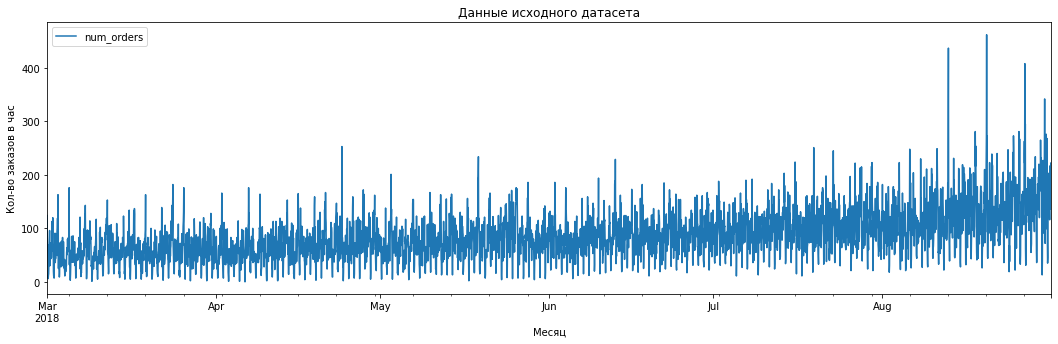

In [8]:
data.plot(figsize=(18,5))
plt.title('Данные исходного датасета')
plt.xlabel('Месяц')
plt.ylabel('Кол-во заказов в час')
plt.show()
#data['num_orders'].plot(figsize=(18,5))

Данные расположены с март по конец августа, как и говорили в прошлой главе. Правда сделать какой-либо анализ по такому графику не представляется возможным, видно, что в августе вроде есть прирост заказов, но лучше посмотреть более подробно под другим углом.

Показательным будет сравнение августа с другими месяцами, скорее всего, поскольку невооруженным глазом видно, что он более непохож на остальные месяцы.

Сделаем ресемплирование по более большому промежутку времени, чтобы график стал более адекватным:

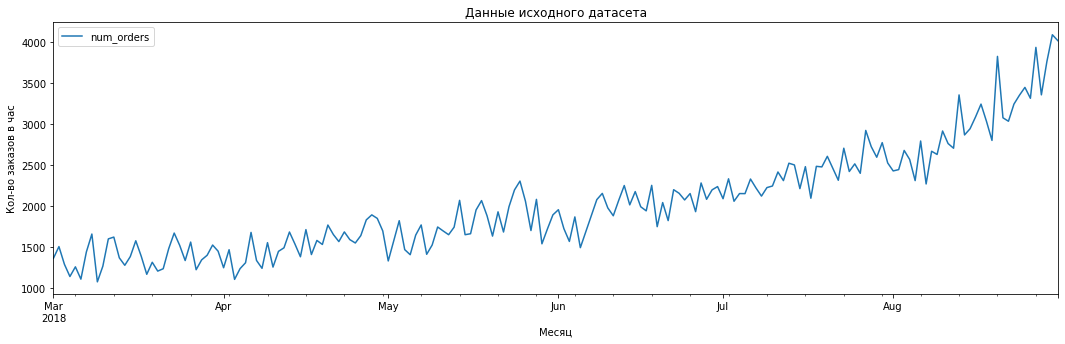

In [9]:
data.resample('1D').sum().plot(figsize=(18,5))
plt.title('Данные исходного датасета')
plt.xlabel('Месяц')
plt.ylabel('Кол-во заказов в час')
plt.show()

По этому графику более очевидно, что количество заказов в августе явно больше всех остальных. Также наблюдается тренд на увеличение количества заказов такси от марта к августу. Правда опять же звучит логично и выглядит тоже, но лучше всего проверить с помощью других параметров, например среднего арифметического или скользящего.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>  

Молодец, что построил временной рад 👍
    
Очень наглядные графики количества заказов по часам и дням за все время.     
    
***
    
По желанию: будет здорово уточнить является ли ряд стационарным или нет)
    
Стационарный ряд - это такой ряд, у которого среднее и стандартное отклонение не меняются.

Проверка на стационарность может быть выполнена следующими способами:
- Визуально: отобразать временной ряд и проверить тенденции или сезонность
- Статистически: разделить временные ряды и сравнить среднее значение и дисперсию каждого раздела
- Провести статистический тест: тест Дики-Фуллера `adfuller()`
    
</div>

<AxesSubplot:xlabel='datetime'>

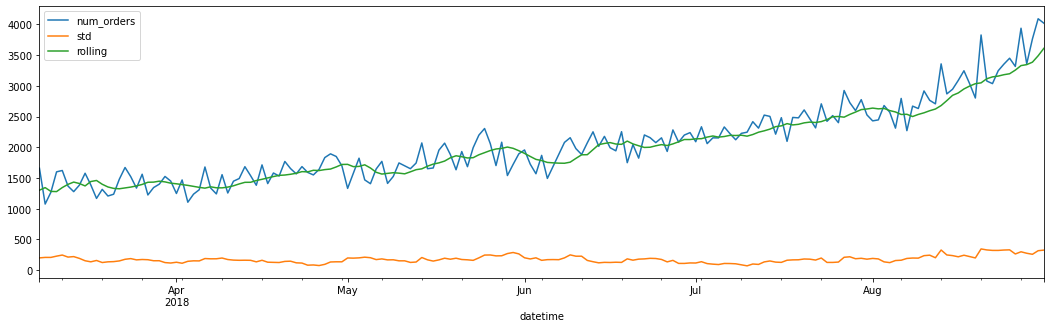

In [10]:
new_data = data.copy()
new_data = new_data.resample('1D').sum()
new_data['rolling'] = new_data['num_orders'].shift().rolling(7).mean()
new_data['std'] = new_data['num_orders'].rolling(7).std()
new_data = new_data.dropna()
new_data[['num_orders', 'std','rolling']].plot(figsize=(18,5))

Несмотря на то, что среднее арифмитическое кажется неизменным, среднее скользящее растет. Рассмотрим тренд, сезонность и остатки. Для показательности сравним первую рабочую неделю двух разных месяцев.

Text(0.5, 1.0, 'seasonal')

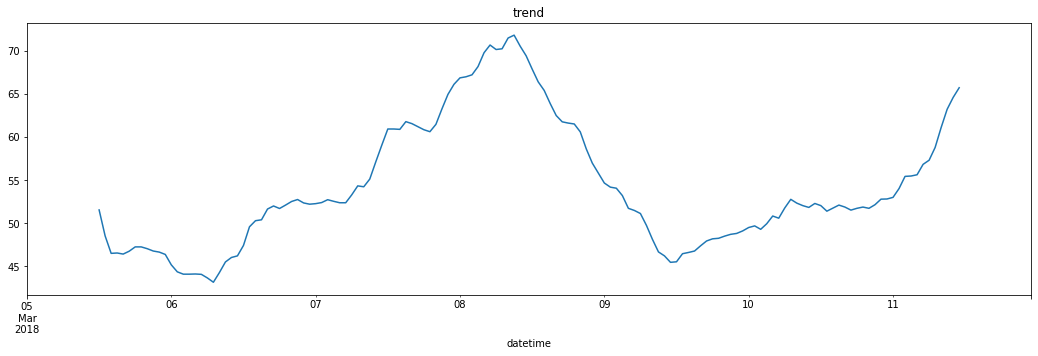

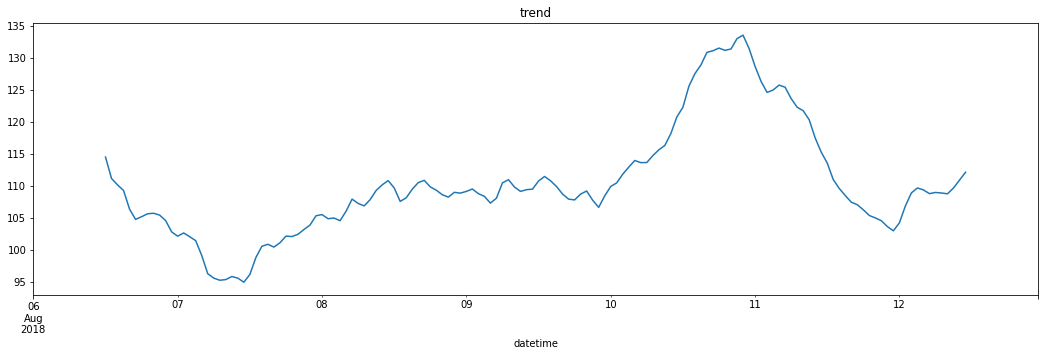

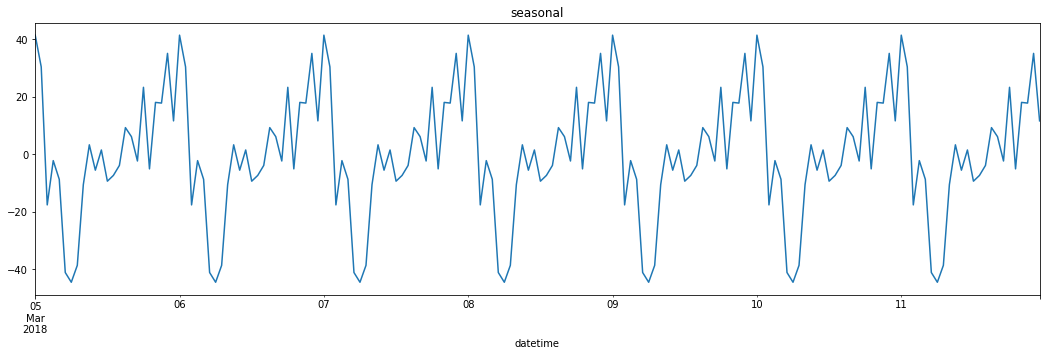

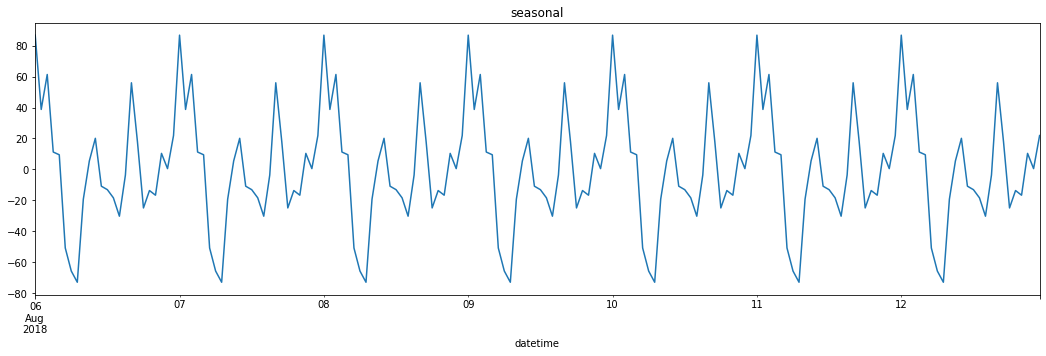

In [11]:
decompose_1 = seasonal_decompose(data['2018-03-05':'2018-03-11'])
plt.figure(figsize=(18, 5))
plt.subplot()
decompose_1.trend.plot()
plt.title('trend')

decompose_2 = seasonal_decompose(data['2018-08-06':'2018-08-12'])
plt.figure(figsize=(18, 5))
plt.subplot()
decompose_2.trend.plot()
plt.title('trend')

plt.figure(figsize=(18, 5))
plt.subplot()
decompose_1.seasonal.plot()
plt.title('seasonal')

plt.figure(figsize=(18, 5))
plt.subplot()
decompose_2.seasonal.plot()
plt.title('seasonal')

Сезонность видна изо дня в день, поэтому лучше сравнить данный показатель в сутках. Что касаемо тренда, в марте пик приходится на середину рабочей недели, в августе же на выходные. Хотя показатели средней суммы заказов гораздо больше в августе, что для марта - пик, для августа - даже не минимальное значение. Вероятно теплая погода предрасполагает чаще передвигаться на такси:)

Text(0.5, 1.0, 'seasonal')

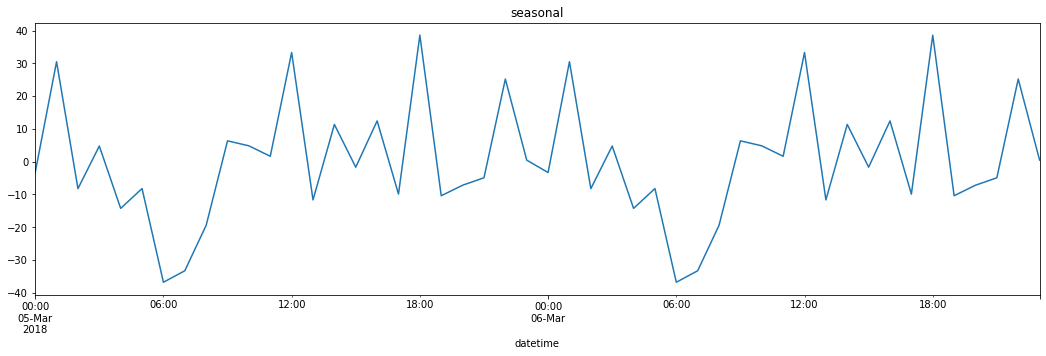

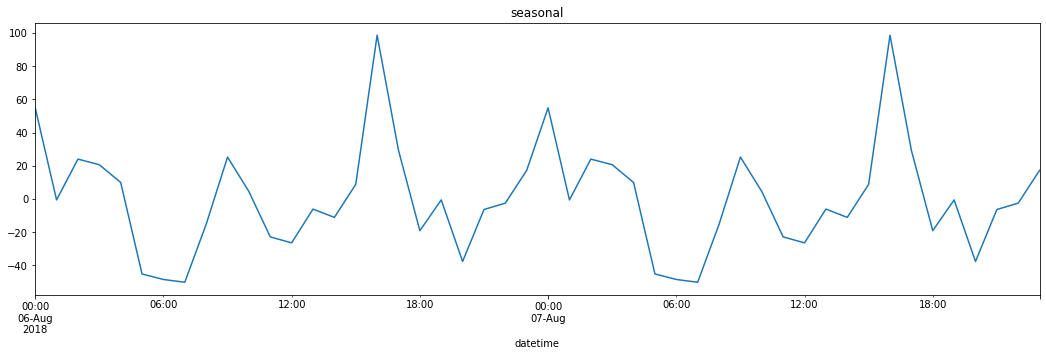

In [12]:
decompose_3 = seasonal_decompose(data['2018-03-05':'2018-03-06'])
plt.figure(figsize=(18, 5))
plt.subplot()
decompose_3.seasonal.plot()
plt.title('seasonal')

decompose_4 = seasonal_decompose(data['2018-08-06':'2018-08-07'])
plt.figure(figsize=(18, 5))
plt.subplot()
decompose_4.seasonal.plot()
plt.title('seasonal')


Сезонность проследуется следующая, поздней ночью - утром, заказов по минимуму. В остальном плане, в марте не то чтобы какой-то период явно выбивается, после 12 в целом держится выше среднего вплоть до ночи. Проверим тренд на всем промежутке

Text(0.5, 1.0, 'trend')

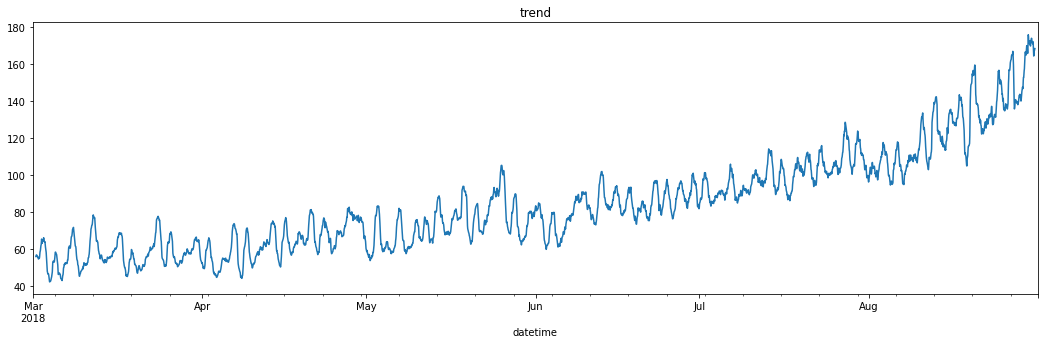

In [13]:
decompose_5 = seasonal_decompose(data['2018-03-01':'2018-08-31'])
plt.figure(figsize=(18, 5))
plt.subplot()
decompose_5.trend.plot()
plt.title('trend')

**Вывод**
- Провели аналитическую работу, изучили временной ряд на сезонность и тренд
- Восходящий тренд на всем промежутке обозначает, что сейчас количество заказов движется преимущественно вверх, значит спрос растет и дело процветает.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>  

- Молодец, что разложил временной ряд на тренды и сезонность, построил графики. 
- Здорово, что сезонность визуализирована на коротком интервале👍 
- Хорошие выводы по этапу - зафиксирован тренд на увеличение заказов такси   
    
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> 
    
Давай немного скорректируем следующий пункт 😊:
    
`decomposed.trend` смотрим за весь период, чтобы сделать выводы по тренду по всему рассматриваемому промежутку (увеличивается\уменьшается ли количество заказов). 
    
Т.е. нужно:
    
~- Скорректировать график `decomposed.trend` - рассмотреть за весь период~
~- Дополнить вывод~
    
PS - с сезонностью все отлично, менять не нужно     

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера №2:</b> 
    
Здорово, что получилось скорректировать график и добавить выводы 👍

</div> 

## Обучение

Чем обучать то, у нас один признак в датасете, шо за делааааа. Ну мы можем разбить на час, день, месяц, но это всего лишь три... Может есть смысл воспользоваться Разности временного ряда, которые в модуле тренажера были, пока непонятно.

UPD: глянул проекты доступные на просторах интернета, действительно рабочая история и пересмотрел код в тренажере, который проглядел, нашел даже подходящий кусок кода там, вывод - не относиться халатно к теории, и желательно сразу после ее выполнения приступать к проекту, а то все забудется.

В качестве моделей используем LGBMRegression, Случайный лес и CatBoostRegressor.
Месяц и год нам не нужны, так как встречаются единично и пользы от этого не будет. Возьмем функцию из тренажера для создания признаков, а именно день недели, час, отстающие значения, скользящее среднее:

In [14]:
def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag) #взятый из тренажера вариант
        
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean() 
    data = data.dropna()

In [15]:
make_features(data, 10, 100)

In [16]:
data = data.dropna()

Разделим признаки, валидационная выборка во временных рядах будет не нужна, об этом говорилось в тренажерной части, разобъем по условию задачи, что тестовая 10 процентов. Не забудем не перемешивать данные, чтобы не испортить хронологию. Не знаю насколько целесообразно масштабирование, тут вроде категориальных признаков нет, поэтому пока оставим как есть.

In [17]:
initial_target = data['num_orders']
initial_features = data.drop(['num_orders'], axis=1)

features_train, features_test, target_train, target_test = train_test_split(
    initial_features, initial_target, test_size=.1 ,shuffle=False)

С помощью гридсерча найдем лучшие гиперпаметры и попробуем найти лучшую модель, чтобы далее прогнать ее в главе тестирования на тестовой выборке

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>  

- Молодец, что подготовил признаки👍 Выделены все нужные - календарные, «отстающие значения» и скользящее среднее (признак, задающий тренд временного ряда). 
- Здорово, что при делении на выборки указан параметр `shuffle=False`, т.к. в `train_test_split` его дефолтное значение True. В случае временных рядов выборки перемешивать не стоит    
          
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> 
    
~А `random_state` из `train_test_split` стоит исключить=)~

</div>

**RandomForestRegressor**

In [18]:
%%time
rfr = RandomForestRegressor(random_state=42)
hyper = { 'max_depth': [x for x in range(1, 5, 1)],
               'n_estimators': [x for x in range(10, 20, 2)]
             }
tscv = TimeSeriesSplit(n_splits=3) 
#.split(features_train)
gscv_rfr = GridSearchCV(rfr, hyper, cv=tscv, scoring='neg_mean_squared_error')
gscv_rfr.fit(features_train, target_train)
print('Лучшие параметры: ', gscv_rfr.best_params_)
print('rfr_rmse', abs(gscv_rfr.best_score_)**0.5)

Лучшие параметры:  {'max_depth': 4, 'n_estimators': 16}
rfr_rmse 32.170065563140845
CPU times: user 3.47 s, sys: 29.8 ms, total: 3.5 s
Wall time: 3.52 s


**LGBMRegressor**

In [19]:
%%time
model_lgbm = LGBMRegressor(random_state=42)
hyper = { 'num_leaves': [5], 
               'learning_rate': [0.1],
             }
grid_lgbm = GridSearchCV(model_lgbm, hyper, scoring='neg_mean_squared_error', cv = tscv)
grid_lgbm.fit(features_train, target_train)
print('Лучшие параметры: ', grid_lgbm.best_params_)
print('rfr_rmse', abs(grid_lgbm.best_score_)**0.5)

Лучшие параметры:  {'learning_rate': 0.1, 'num_leaves': 5}
rfr_rmse 27.70306955138553
CPU times: user 3min, sys: 1.62 s, total: 3min 2s
Wall time: 3min 7s


**CatBoostRegressor**

In [20]:
%%time
model_cbr = CatBoostRegressor(random_state=42)
hyper = { 'learning_rate': [0.1, 0.5, 0.9],
               'max_depth': [4,5,6], 'verbose':[False]
             }
grid_cbr = GridSearchCV(model_cbr, hyper, scoring='neg_mean_squared_error', cv = tscv)
grid_cbr.fit(features_train, target_train)
print('Лучшие параметры: ', grid_cbr.best_params_)
print('rfr_rmse', abs(grid_cbr.best_score_)**0.5)

Лучшие параметры:  {'learning_rate': 0.1, 'max_depth': 5, 'verbose': False}
rfr_rmse 27.567753142585033
CPU times: user 51.4 s, sys: 3.18 s, total: 54.6 s
Wall time: 1min 21s


**Вывод:** Разибили на тестовую и тренировочную выборки, нашли лучшую модель обучения, ей оказалась CatBoostRegressor, с параметрами{'learning_rate': 0.1, 'max_depth': 5}, проверим ее в следующей главе на тестовой выборке.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>

Здорово, что рассмотрел несколько алгоритмов. А еше используешь `GridSearchCV()` для подбора оптимальных гиперпараметров 🔥   

</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> 
    
~Тут нюанс с кросс-валидацией. В случае использовании кросс-валидации с временным рядом нужно задать `TimeSeriesSplit`.~ 
    
~Данные не должны пересекаться по времени, т.е. перетасовка обычным способом не подходит. `TimeSeriesSplit` помогает решить эту проблему.~   
   
Подробнее: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html  
    
~PS - т.е. нужно скорректировать параметр `cv` в `GridSearchCV()`~
  
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера №2:</b> 
    
Супер👍

</div> 

## Тестирование

In [25]:
#model_lgbmr = LGBMRegressor(learning_rate=.1, num_leaves=5, random_state= 42)
#model_lgbmr.fit(features_train, target_train)
#target_predict = model_lgbmr.predict(features_test)
#rsme_lgbmr = mean_squared_error(target_test, target_predict) ** 0.5
#rsme_lgbmr
#score под 45

In [24]:
model_cbr = CatBoostRegressor(learning_rate=.1, max_depth=5, random_state= 42)
model_cbr.fit(features_train, target_train)
target_predict = model_cbr.predict(features_test)
rsme_cbr = mean_squared_error(target_test, target_predict) ** 0.5
rsme_cbr

44.59949412455063

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил замечания, но столкнулся с проблемой, что гридсерч для ЛГБМ отрабатывает пару световых лет, да и обучается тоже, поэтому перебор в гридсерче убрал (считай нет перебора и гридсерч бессмысленен). Почему такое произошло, хотя я буквально не менял данные с первой версии? Скорее наоборот постарался оптимизировать скорость работы за счет уменьшения логов и количества фичей соответственно. Я немного не понимаю, почему правки малочисленные настолько сильно усложнили обучение, да и вряд ли в них дело, поскольку даже при тестировании такой модели как-то долго отрабатывает все о-О. Буду ра/д, если поделишься мыслями, Александра, а то что-то я на затупичах (хотя вероятно ЛГБМ просто сложнее и если иметь в запасе пару часов свободных, то он подберет параметры лучше). До изменений в гридсерче считай перебиралось 3^2 комбинаций параметров и все летало в течение 4-5 минут, сейчас же одна комбинация на три минуты:C </div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера №2:</b> 
    
Гридсёрч иногда считает долго (хотя есть и ускоренная версия), на stackoverflow по запросу "Gridsearchcv is slow" не один вопрос можно найти  😅 
    
Рекомендую познакомиться с `RandomizedSearchCV`, ниже оставлю несколько ссылок. Статьи на английском, но с примерами.
    
***
    
Для подбора оптимальных параметров можно использовать функции Gridsearchcv или Randomizedsearchcv. 
    
1. Статья про разницу между ними: 
    https://towardsdatascience.com/gridsearchcv-or-randomsearchcv-5aa4acf5348c#:~:text=RandomSearchCV%20has%20the%20same%20purpose,parameters%20to%20improve%20your%20model.&text=The%20main%20difference%20between%20the,want%20to%20sample%20and%20test. 
    
2. И просто очень большая статья по их применению: 
    https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/ 
    
3. Совсем обьемная статья с огромным количеством библиотек для подбора гиперпараметров:
    https://neptune.ai/blog/hyperparameter-tuning-in-python-complete-guide/. 
    
4. Ускоренная версия GridsearchCV 
    https://towardsdatascience.com/20x-times-faster-grid-search-cross-validation-19ef01409b7c.       
    
</div> 

**Вывод:** Получили значения удовлетворяющие поставленной задаче, празднуем маленькую победу до ревью, после которого впадем в отчаяние C:

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>

Хороший результат 🔥 
    
***
    
        празднуем маленькую победу до ревью, после которого впадем в отчаяние C:
    
 😅     

</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> 
    
Было бы здорово визуализировать предсказанные и реальные значения у лучшей модели😊

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Обязательно попробую перед заливом на репозиторий, как будет время, а то сейчас в погоне за дедлайнами:CCC
Спасибо за твою работу!</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера №2:</b> 
    
Молодец, что уже создаешь портфолио с проектами 🔥  
    
</div> 

***

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> 
    
~Давай сформируем итоговый вывод про проекту =)~
    
</div>

## Вывод по проекту

В ходе данного проекта ближе познакомились с временными рядами и инструментами взаимодействия с ними, а конкретно:
- Применили практические навыки визуализации различных графиков одних и тех же данных (тренд и сезонность).
- Проанализировали полученные графики.
- Сравнили 3 модели с разными гиперпараметрами, выбрал лучшую модель по RMSE.
- Лучшую модель проверили на тестовой выборке, получили достаточные значения.

<div class="alert alert-success">
<b>✔️ Заключительный комментарий ревьюера:</b> 
    
Герман, спасибо за проделанную работу!   
   
Проект на хорошем уровне🔥
    
Есть структура по заданиям, построены графики, корректно выделены признаки. Классно, что рассмотрены несколько алгоритмов и определен лучший для проверки на тесте.         

***    
 
Проект выполнен хорошо, есть только несколько пунктов, которые стоит улучшить:
1. Скорректировать график `decomposed.trend` - рассмотреть за весь период 
2. Исключить `random_state` из `train_test_split` 
3. Т.к. используешь кросс-валидацию, то с временным рядом нужно задать `TimeSeriesSplit`. 
4. Сформировать итоговый вывод

***

Возвращаю тебе работу, чтобы ты смог доделать проект и задать вопросы)
    
Успехов!

</div>

<div class="alert alert-success">
<b>✔️ Заключительный комментарий ревьюера №2:</b> 
    
Герман,   
   
Твою работу принимаю.
    
Желаю удачи в учебе 😊

</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48